# Decision Tree Algorithm

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

![https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png)

Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network. Its training time is faster compared to the neural network algorithm. The time complexity of decision trees is a function of the number of records and number of attributes in the given data. The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions. Decision trees can handle high dimensional data with good accuracy.

# How does the Decision Tree Algorithm Work?

The basic idea behind any decision tree algorithm is as follows:
- Select the best attribute using Attribute Selection Measures(ASM) to split the records.
- Make that attribute a decision node and breaks the dataset into smaller subsets.
- Starts tree building by repeating this process recursively for each child until one of the condition will match:
    - All the tuples belong to the same attribute value.
    - There are no more remaining attributes.
    - There are no more instances.

# Important terminology

- **Root Node**: This attribute is used for dividing the data into two or more sets. The feature attribute in this node is selected based on Attribute Selection Techniques.
- **Branch or Sub-Tree**: A part of the entire decision tree is called a branch or sub-tree.
- **Splitting**: Dividing a node into two or more sub-nodes based on if-else conditions.
- **Decision Node**: After splitting the sub-nodes into further sub-nodes, then it is called the decision node.
- **Leaf or Terminal Node**: This is the end of the decision tree where it cannot be split into further sub-nodes.
- **Pruning**: Removing a sub-node from the tree is called pruning.

# What is Attribute Selective Measure(ASM)?

Attribute Subset Selection Measure is a technique used in the data mining process for data reduction. The data reduction is necessary to make better analysis and prediction of the target variable.

The two main ASM techniques are

- Gini index
- Information Gain(ID3)

## Gini index

The measure of the degree of probability of a particular variable being wrongly classified when it is randomly chosen is called the Gini index or Gini impurity. The data is equally distributed based on the Gini index.

Mathematical Formula :

![https://cdn-images-1.medium.com/max/300/0*pE3uG1i28u5ClQVQ.png](https://cdn-images-1.medium.com/max/300/0*pE3uG1i28u5ClQVQ.png)

Pi = probability of an object being classified into a particular class.

When you use the Gini index as the criterion for the algorithm to select the feature for the root node.,The feature with the least Gini index is selected.

## Information Gain(ID3)

Entropy is the main concept of this algorithm, which helps determine a feature or attribute that gives maximum information about a class is called Information gain or ID3 algorithm. By using this method, we can reduce the level of entropy from the root node to the leaf node.

Mathematical Formula :

![https://cdn-images-1.medium.com/max/264/0*REu9I7JF09rPT5FD.png](https://cdn-images-1.medium.com/max/264/0*REu9I7JF09rPT5FD.png)

‘p’, denotes the probability of E(S), which denotes the entropy. The feature or attribute with the highest ID3 gain is used as the root for the splitting.

---

In [1]:
import pandas as pd
import math

In [2]:
train = pd.read_csv('madfhantr.csv')

In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
train.dropna(inplace=True)

In [5]:
train = train[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]

train['Gender']=train['Gender'].replace(to_replace='Male',value='1')
train['Gender']=train['Gender'].replace(to_replace='Female',value='0')


train['Married']=train['Married'].replace(to_replace='Yes',value='1')
train['Married']=train['Married'].replace(to_replace='No',value='0')


train['Self_Employed']=train['Self_Employed'].replace(to_replace='No',value='0')
train['Self_Employed']=train['Self_Employed'].replace(to_replace='Yes',value='1')


train['Education']=train['Education'].replace(to_replace='Graduate',value='1')
train['Education']=train['Education'].replace(to_replace='Not Graduate',value='0')

In [7]:
X = train.drop(columns=['Loan_Status'])
y = train.Loan_Status


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Before we visualize the tree, let us do some calculations and find out the root node by using Entropy.

### **Calculation 1:** Find the Entropy of the total dataset

![https://cdn-images-1.medium.com/proxy/0*iEYUSmQpG3JdnHzM.png](https://cdn-images-1.medium.com/proxy/0*iEYUSmQpG3JdnHzM.png)

- p = no of positive cases(Loan_Status accepted)
- n = number of negative cases(Loan_Status not accepted)

In the data set, we have

p = 332 , n=148, p+n=480

In [38]:
p = 332
n = 148

In [39]:
-p/(p+n)*math.log2(p/(p+n)) - n/(p+n)*math.log2(n/(p+n))

0.8912402011913028

### **Calculation 2:** Now find the Entropy and gain for every column

In [40]:
train['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

#### **Gender**

There are two types in this male(1) and female(0)

**Condition 1:** Male

data-set with all male’s in it and then,

p = 278, n=116 , p+n=394

Entropy(G=Male) = 0.87

**Condition 2:** Female

data-set with all female’s in it and then,

p = 54 , n = 32 , p+n = 86

Entropy(G=Female) = 0.95

**Average Information in Gender column is**

![https://cdn-images-1.medium.com/max/868/0*iqh79gPraxvz-TFN.png](https://cdn-images-1.medium.com/max/868/0*iqh79gPraxvz-TFN.png)

I(Gender) = (Entropy(G = Male) * p+n/480) + (Entropy(G = Female) * p+n/480)

In [41]:
(0.87*(278+116)/480) + (0.95*(54+32)/480)

0.8843333333333332

![https://cdn-images-1.medium.com/max/1024/0*xDCyd_1ffDcO7PBT.png](https://cdn-images-1.medium.com/max/1024/0*xDCyd_1ffDcO7PBT.png)

Gain = 0.89 – 0.88

Gain = 0.001

![https://cdn-images-1.medium.com/max/286/0*f2MyHJDrVbYWMQqw.png](https://cdn-images-1.medium.com/max/286/0*f2MyHJDrVbYWMQqw.png)

Credit Score has the highest gain so that will be used in the root node

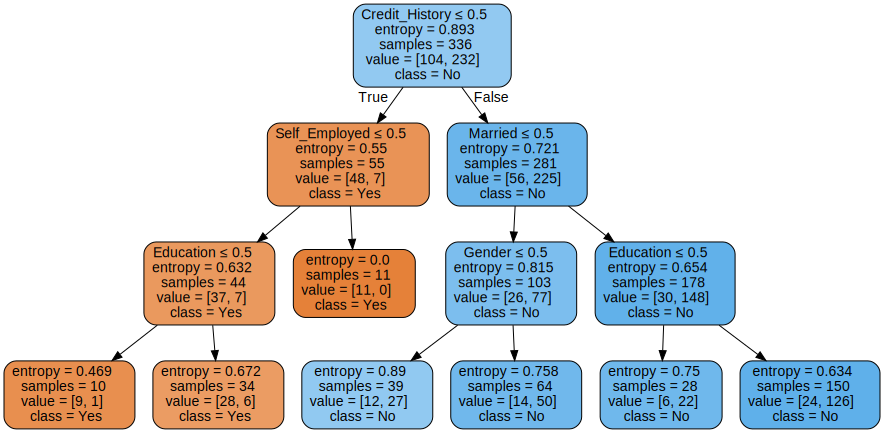

In [42]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=['Gender','Married','Education','Self_Employed','Credit_History'],
                               class_names=['Yes','No'],filled=True,
                                rounded=True,  
                              special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("Entropy")
graph

Well, it’s like we got the calculations right!

In [43]:
clf.score(X_test,y_test)

0.7986111111111112

In [46]:
clf.feature_importances_

array([0.00989198, 0.02781814, 0.00829242, 0.03330419, 0.92069327])

## Assumptions made while creating the decision tree:
- While starting the training, the whole data-set is considered as the root.
- The input values are preferred to be categorical.
- Records are distributed based on attribute values.
- The attributes are placed as the root node of the tree is based on statistical results.

## Optimizing Decision Tree Performance
- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

## Pros
- Decision trees are easy to interpret and visualize.
- It can easily capture Non-linear patterns.
- It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
- It can be used for feature engineering such as predicting missing values, suitable for variable selection.
- The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

## Cons
- Sensitive to noisy data. It can overfit noisy data.
- The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
- Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/